# Assignment 3 - Clustering town councils
## Big Data Science - Arnau Casanova & Alex Flores

### 1. Get the data - acquire the data from the csv file

In [2]:
import pandas as pd
import numpy as np

budgets_dataset = pd.read_csv("C:/Users/Arnau/Desktop/BigDataScience_Assignments/Pressupostos_dels_ens_municipals_de_Catalunya.csv")
name, counts = np.unique(budgets_dataset.NOM_COMPLERT, return_counts = True)
dict(zip(name,counts))


{"Agència Local d'Energia de Barcelona": 245,
 'Agència Tributària de Sabadell': 208,
 "Agència d'Ecologia Urbana de Barcelona": 217,
 'Agència de Desenvolupament Econòmc i Turístic (ADET)': 828,
 'Agència de Desenvolupament Econòmic del Garraf': 190,
 'Agència de Desenvolupament del Berguedà': 199,
 'Agència de Desenvolupament del Ripollès': 230,
 'Agència de Promoció de Ciutat "Reus Promoció"': 205,
 "Ajuntament d'Abrera": 317,
 "Ajuntament d'Agramunt": 832,
 "Ajuntament d'Aguilar de Segarra": 347,
 "Ajuntament d'Agullana": 251,
 "Ajuntament d'Aiguafreda": 275,
 "Ajuntament d'Aiguamúrcia": 830,
 "Ajuntament d'Aiguaviva": 259,
 "Ajuntament d'Aitona": 833,
 "Ajuntament d'Albanyà": 241,
 "Ajuntament d'Albatàrrec": 243,
 "Ajuntament d'Albesa": 832,
 "Ajuntament d'Albinyana": 833,
 "Ajuntament d'Albons": 242,
 "Ajuntament d'Alcanar": 830,
 "Ajuntament d'Alcanó": 833,
 "Ajuntament d'Alcarràs": 834,
 "Ajuntament d'Alcoletge": 833,
 "Ajuntament d'Alcover": 332,
 "Ajuntament d'Aldover": 833,


## 2. Keep data from year 2016 and town couincils (ajuntament), or in other words, discard 2017 data and data comming from entities that are not called "Ajuntament"

In [3]:
budgets_dataset = budgets_dataset.loc[budgets_dataset.ANY_EXERCICI == '01/01/2016 12:00:00 AM']
budgets_dataset = budgets_dataset.loc[budgets_dataset.NOM_COMPLERT.str.contains('Ajuntament')]
budgets_dataset.shape

name, counts = np.unique(budgets_dataset.NOM_COMPLERT, return_counts = True)
dict(zip(name,counts))

{"Ajuntament d'Abrera": 317,
 "Ajuntament d'Agramunt": 832,
 "Ajuntament d'Aguilar de Segarra": 347,
 "Ajuntament d'Agullana": 251,
 "Ajuntament d'Aiguafreda": 275,
 "Ajuntament d'Aiguamúrcia": 830,
 "Ajuntament d'Aiguaviva": 259,
 "Ajuntament d'Aitona": 833,
 "Ajuntament d'Albanyà": 241,
 "Ajuntament d'Albatàrrec": 243,
 "Ajuntament d'Albesa": 832,
 "Ajuntament d'Albinyana": 833,
 "Ajuntament d'Albons": 242,
 "Ajuntament d'Alcanar": 830,
 "Ajuntament d'Alcanó": 833,
 "Ajuntament d'Alcarràs": 834,
 "Ajuntament d'Alcoletge": 833,
 "Ajuntament d'Alcover": 332,
 "Ajuntament d'Aldover": 833,
 "Ajuntament d'Alella": 343,
 "Ajuntament d'Alfara de Carles": 249,
 "Ajuntament d'Alfarràs": 833,
 "Ajuntament d'Alforja": 833,
 "Ajuntament d'Alfés": 832,
 "Ajuntament d'Algerri": 833,
 "Ajuntament d'Alguaire": 833,
 "Ajuntament d'Alió": 255,
 "Ajuntament d'Almacelles": 833,
 "Ajuntament d'Almatret": 833,
 "Ajuntament d'Almenar": 833,
 "Ajuntament d'Almoster": 302,
 "Ajuntament d'Alp": 832,
 "Ajuntam

## 3.Analize the columns and design how will you organize your dataset

As we can see in the data all town councils use the same levels, but not the same description, neither the same screen code, there's not a solid pattern but we can see there's a relationship between levels and screen code with the digits acording to the level.

Analyzing the budget of level we can see that the sum of the budgets at level one and level two are always the same and if we look carefully we can see that the budget at level two is the entire budget and on level three there are many budgets that together compute the budget registred at level two, with this information on our mind and in order to optimize the clustering we can only keep data from budgets coming from level two.

We can also see that there are many budgets with value zero, they will be removed for a better data consistency, after that we will need the existence of a new dataset containing the result data extracted to do the town council budget's clustering.

To create that dataset we will try to register for every town council code, the sum of all the imports registered as "D" (expenses) and the sum of all the imports registered as "I" (income).

Having all this tips in mind, we will try to do a pair of clusters, one containing the data from all the levels and the other containing only the data from level two. With that we want to investigate if town council's levels are related, or every town council has independency on how they manage the budgets.


In [4]:
#Number of town councils 
name.shape

(882,)

In [5]:
#Number of different levels
np.unique(budgets_dataset.NIVELL)

array([1, 2, 3, 4], dtype=int64)

In [6]:
#Number of different descriptions
np.unique(budgets_dataset.DESCRIPCIO).shape


(649,)

In [7]:
#Display the different descriptions for expenses

def description_despesa(data):
    desc, count = np.unique(data.loc[(data.TIPUS_PARTIDA == 'D') & (data.TIPUS_CLASSIF == 'F'), ['DESCRIPCIO']], return_counts = True)
    return dict(zip(desc,counts))

res = description_despesa(budgets_dataset)
print("length: ", len(res))
res

length:  128


{"Abastament domiciliari d'aigua potable": 317,
 'Accés als nuclis de població': 832,
 'Actuacions de caràcter econòmic': 347,
 'Actuacions de caràcter general': 251,
 'Actuacions de protecció i promoció social': 275,
 'Administració financera i tributària': 830,
 'Administració general': 259,
 "Administració general d'educació": 833,
 "Administració general d'esports": 241,
 "Administració general d'habitatge i urbanisme": 243,
 "Administració general d'indústria i energia": 832,
 "Administració general d'infraestructures": 833,
 'Administració general de comerç, turisme i pimes': 242,
 'Administració general de cultura': 830,
 'Administració general del medi ambient': 833,
 'Administració general del transport': 834,
 'Administració gral. agricultura, ramaderia i pesca': 833,
 'Administració gral. de seguretat i protecció civil': 332,
 'Agricultura, ramaderia i pesca': 833,
 'Altre transport de viatgers': 343,
 'Altres actuacions agricultura, ramaderia i pesca': 249,
 'Altres actuaci

In [8]:
#Reduce number of levels and just keep level 2
budgets_dataset_2levels = budgets_dataset.loc[budgets_dataset.NIVELL == 2]
budgets_dataset_2levels
                              

,ANY_EXERCICI,TIPUS_PARTIDA,TIPUS_CLASSIF,CODI_PANTALLA,NIVELL,DESCRIPCIO,IMPORT,ID_ESTRUCTURA,ESTRUCTURA,CODI_ENS,NOM_COMPLERT
245,01/01/2016 12:00:00 AM,D,F,33.0,2,Cultura,394700.00,7,33,2500300000,Ajuntament d'Agramunt
671,01/01/2016 12:00:00 AM,D,F,34.0,2,Esport,7000.00,7,34,1700250006,Ajuntament d'Aiguaviva
2326,01/01/2016 12:00:00 AM,I,E,11.0,2,Impostos sobre el capital,5593799.37,7,11,800180001,Ajuntament d'Abrera
2331,01/01/2016 12:00:00 AM,I,E,13.0,2,Impost sobre activitats econòmiques,1078507.90,7,13,800180001,Ajuntament d'Abrera
2334,01/01/2016 12:00:00 AM,I,E,29.0,2,Altres impostos indirectes,300000.00,7,29,800180001,Ajuntament d'Abrera
2337,01/01/2016 12:00:00 AM,I,E,30.0,2,Taxes per la prestació de serveis públics bàsics,1491318.47,7,30,800180001,Ajuntament d'Abrera
2341,01/01/2016 12:00:00 AM,I,E,31.0,2,T. prestació serveis públics carac. social i p...,1194110.88,7,31,800180001,Ajuntament d'Abrera
2346,01/01/2016 12:00:00 AM,I,E,32.0,2,Taxes per activitats de competència local,131000.00,7,32,800180001,Ajuntament d'Abrera
2349,01/01/2016 12:00:00 AM,I,E,33.0,2,T. ús privatiu o aprofit. espai domini públ. l...,525000.00,7,33,800180001,Ajuntament d'Abrera
2352,01/01/2016 12:00:00 AM,I,E,36.0,2,Vendes,1300.00,7,36,800180001,Ajuntament d'Abrera


In [9]:
def concepte_despesa_ajuntament(data, ajuntament):
    tmp = data.loc[(data.TIPUS_PARTIDA == 'D') & (data.NOM_COMPLERT == ajuntament),['DESCRIPCIO', 'IMPORT', 'CODI_PANTALLA', 'NIVELL']]
    tmp[['CODI_PANTALLA']] = tmp[['CODI_PANTALLA']].astype(str)
    return tmp.sort_values(['CODI_PANTALLA'])
    
pd.set_option('display.max_rows', 500)
concepte_despesa_ajuntament(budgets_dataset, "Ajuntament d'Ogassa")

,DESCRIPCIO,IMPORT,CODI_PANTALLA,NIVELL
44869,Deute públic,46215.0,0.0,1
44872,Serveis públics bàsics,88700.0,1.0,1
45003,Despeses de personal,95000.0,1.0,1
44870,Deute públic,46215.0,1.0,2
44871,Deute públic,46215.0,11.0,3
44873,Seguretat i mobilitat ciutadana,0.0,13.0,2
45004,Personal laboral,72000.0,13.0,2
44874,Administració gral. de seguretat i protecció c...,0.0,130.0,3
45006,Retribucions bàsiques,72000.0,130.0,4
45005,Laboral fix,72000.0,130.0,3


In [10]:
#Remove zero budgets
budgets_dataset_2levels = budgets_dataset_2levels.loc[budgets_dataset["IMPORT"] != 0]
budgets_dataset = budgets_dataset.loc[budgets_dataset["IMPORT"] != 0]

pd.set_option('display.max_rows', 500)
concepte_despesa_ajuntament(budgets_dataset, "Ajuntament d'Ogassa")

,DESCRIPCIO,IMPORT,CODI_PANTALLA,NIVELL
44869,Deute públic,46215.0,0.0,1
44872,Serveis públics bàsics,88700.0,1.0,1
45003,Despeses de personal,95000.0,1.0,1
44870,Deute públic,46215.0,1.0,2
44871,Deute públic,46215.0,11.0,3
45004,Personal laboral,72000.0,13.0,2
45005,Laboral fix,72000.0,130.0,3
45006,Retribucions bàsiques,72000.0,130.0,4
44880,Habitatge i urbanisme,77700.0,15.0,2
44882,"Urbanisme: Planejament,gest exec. i disc. urb.",77700.0,151.0,3


## Clustering the data 

To cluster the data we need a new dataset with all the town council with their sum of budgets of incomes and expenses, to do this we will define a function that will do the work and will generate a new array containing the useful data to implement the k-means clustering.

In [11]:
budgets_dataset.shape

(178168, 11)

In [12]:
budgets_dataset_2levels.shape

(41991, 11)

In [13]:
def generateTable(budgets):
    ids = np.unique(budgets.CODI_ENS)
    resultat = np.empty((ids.shape[0], 3))
    i=0
    for identifier in ids:
        despeses =  np.sum(budgets.loc[(budgets.TIPUS_PARTIDA == 'D') & (budgets.CODI_ENS == identifier), ["IMPORT"]].IMPORT)
        ingressos = np.sum(budgets.loc[(budgets.TIPUS_PARTIDA == 'I') & (budgets.CODI_ENS == identifier), ["IMPORT"]].IMPORT)
        resultat[i] = [identifier, ingressos, despeses]
        i+=1
    return resultat

In [111]:
new_budgets_dataset = generateTable(budgets_dataset)
new_budgets_dataset_2levels = generateTable(budgets_dataset_2levels)

In [54]:
new_budgets_dataset

array([[8.00180001e+08, 4.52862159e+07, 9.52842650e+07],
       [8.00230008e+08, 1.05162000e+07, 2.12483121e+07],
       [8.00390004e+08, 4.19815289e+07, 8.85857316e+07],
       ...,
       [4.39057000e+09, 1.27906000e+08, 2.70731853e+08],
       [4.39060000e+09, 1.62978725e+07, 3.23994095e+07],
       [4.39076001e+09, 3.44369000e+07, 7.03371000e+07]])

In [16]:
new_budgets_dataset_2levels

array([[8.00180001e+08, 1.42794434e+07, 2.85588868e+07],
       [8.00230008e+08, 3.40620000e+06, 6.81240000e+06],
       [8.00390004e+08, 1.32579572e+07, 2.65159145e+07],
       ...,
       [4.39057000e+09, 3.98770000e+07, 7.97540000e+07],
       [4.39060000e+09, 5.09635262e+06, 1.01927052e+07],
       [4.39076001e+09, 1.10290000e+07, 2.20580000e+07]])

We can appreciate the difference between the values in the two datasets, so now we will work with both datasets

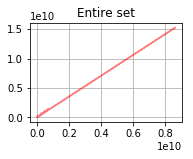

In [18]:
#Some plots of the generated data

import matplotlib.pyplot as plot

# linear
plot.subplot(221)
plot.plot(new_budgets_dataset[:, 1], new_budgets_dataset[:, 2], c = 'red', alpha = 0.5)
plot.yscale('linear')
plot.title('Entire set')
plot.grid(True)



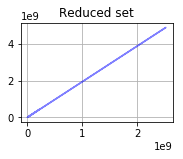

In [19]:
plot.subplot(221)
plot.plot(new_budgets_dataset_2levels[:, 1], new_budgets_dataset_2levels[:, 2], c = 'blue', alpha = 0.5)
plot.yscale('linear')
plot.title('Reduced set')
plot.grid(True)

As we can see there's a lineality in the datasets this is good for the future clustering.

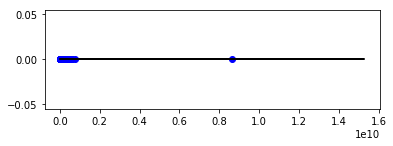

In [21]:
#Plot representing the generated dataset
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

plot.figure(2)
plot.subplot(211)
plot.plot(new_budgets_dataset[:, 1], f(new_budgets_dataset[:, 1]), 'bo', new_budgets_dataset[:, 2], f(new_budgets_dataset[:, 2]), 'k')

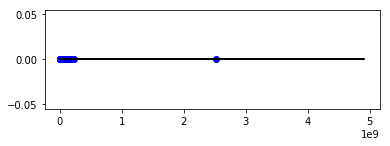

In [87]:
plot.figure(2)
plot.subplot(211)
plot.plot(new_budgets_dataset_2levels[:, 1], f(new_budgets_dataset_2levels[:, 1]), 'bo', new_budgets_dataset_2levels[:, 2], f(new_budgets_dataset_2levels[:, 2]), 'k')

We can see a lost point that is very far from the other town councils, we will try to discard that town council in our clustering in order to obtain a better perspective of the plot.

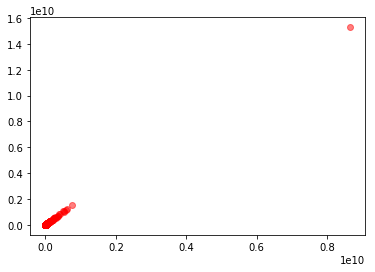

In [68]:
#Scatter plots
plot.scatter(new_budgets_dataset[:, 1], new_budgets_dataset[:, 2], c='red', alpha=0.5)

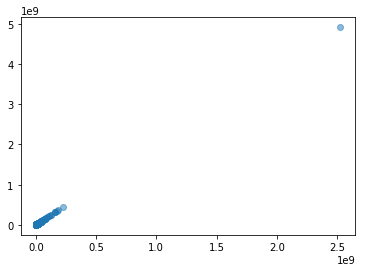

In [66]:
plot.scatter(new_budgets_dataset_2levels[:, 1], new_budgets_dataset_2levels[:, 2], alpha = 0.5)

Aparently, we cannot see a clear difference between the two plots, just that the value of the axis is reduced at level two, this is obvius since the first plot takes all the levels, so the sum of all budgets of the town council.

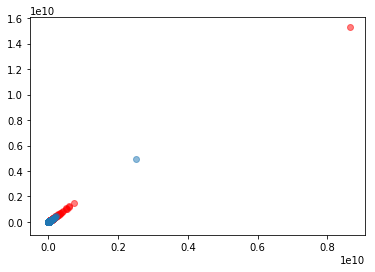

In [24]:
#Combined scatter plot
plot.scatter(new_budgets_dataset[:, 1], new_budgets_dataset[:, 2], c='red', alpha=0.5)
plot.scatter(new_budgets_dataset_2levels[:, 1], new_budgets_dataset_2levels[:, 2], alpha = 0.5)

As we can see in this mixed plot is the linearlity between the two datasets, where the difference is the reduction on the values on the dataset focused only on level two budgets. We can also see the two points that are very far from the rest clearly.

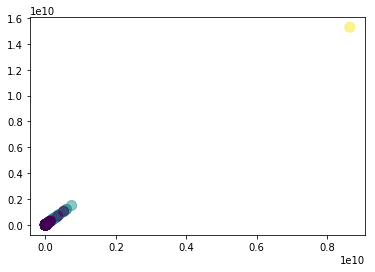

In [91]:
#Implementing k-means
from sklearn.cluster import KMeans
n = 3
cl = KMeans(n_clusters=n)
cl.fit(new_budgets_dataset)
colors = cl.predict(new_budgets_dataset)
plot.scatter(new_budgets_dataset[:, 1], new_budgets_dataset[:, 2], c=colors, s=100, alpha = 0.5)

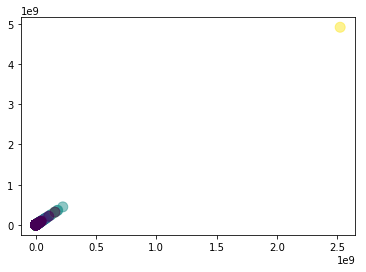

In [92]:
n = 5
cl = KMeans(n_clusters=n)
cl.fit(new_budgets_dataset_2levels)
colors = cl.predict(new_budgets_dataset_2levels)
plot.scatter(new_budgets_dataset_2levels[:, 1], new_budgets_dataset_2levels[:, 2], c=colors, s=100, alpha = 0.5)

In [112]:
#Eliminating lost point
i = 0
x = len(new_budgets_dataset)-1
while i < x:
    if new_budgets_dataset[i][2] > 8000000000:
        aux = new_budgets_dataset[i]
        print(new_budgets_dataset[i][2])
        new_budgets_dataset = np.delete(new_budgets_dataset, i, 0)
    i+=1
    
z = 0
y = len(new_budgets_dataset_2levels)-1
while z < y:
    if new_budgets_dataset_2levels[z][2] > 2500000000:
        aux = new_budgets_dataset_2levels[z]
        print(new_budgets_dataset_2levels[z][2])
        new_budgets_dataset_2levels = np.delete(new_budgets_dataset_2levels, z, 0)
    z+=1

15285132573.84
4911868463.96


In [113]:
len(new_budgets_dataset)

881

In [114]:
len(new_budgets_dataset_2levels)

881

In [ ]:
#Scatter plots with clean data


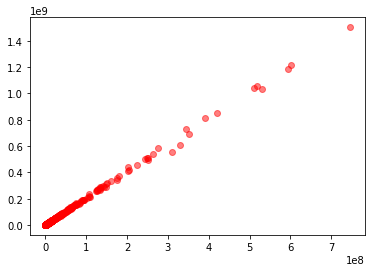

In [75]:
plot.scatter(new_budgets_dataset[:, 1], new_budgets_dataset[:, 2], c='red', alpha=0.5)

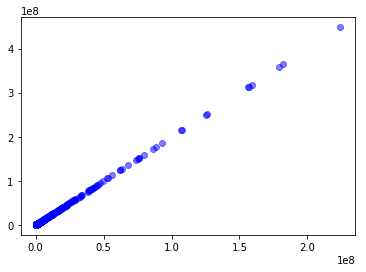

In [77]:
plot.scatter(new_budgets_dataset_2levels[:, 1], new_budgets_dataset_2levels[:, 2], c='blue', alpha=0.5)

At first sight we can appreciate that the 2level dataset is more linear and we can see that on both plots there is abudance of points in the low values.

After verifiying the data we are ready to do the clustering and we will remove the column containing the town id.


In [115]:
new_budgets_dataset = new_budgets_dataset[:,1:3]
new_budgets_dataset_2levels = new_budgets_dataset_2levels[:,1:3]

<function matplotlib.pyplot.show>

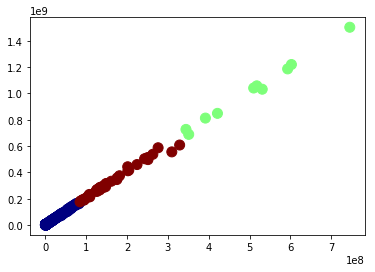

In [148]:
#Implementing k-means clean dataset
from sklearn.cluster import KMeans
import matplotlib.cm as cm
n = 3
cl = KMeans(n_clusters=n)
cl.fit(new_budgets_dataset)
colors = cl.predict(new_budgets_dataset)
t = np.arange(256)
plot.scatter(new_budgets_dataset[:, 0], new_budgets_dataset[:, 1],  c = colors, cmap=cm.jet, s=100)
plot.show

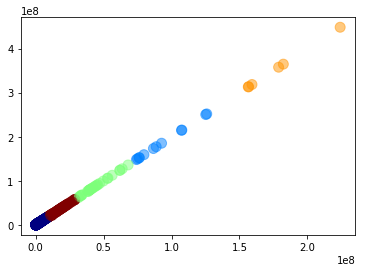

In [145]:
#2level dataset
n = 5
cl = KMeans(n_clusters=n)
cl.fit(new_budgets_dataset_2levels)
colors = cl.predict(new_budgets_dataset_2levels)
plot.scatter(new_budgets_dataset_2levels[:, 0], new_budgets_dataset_2levels[:, 1], c=colors, s=100, cmap = cm.jet, alpha = 0.5)

## Conclusion

We can see that aparently there's no big difference in clustering with only level 2 or all levels, after erasing the lost points we can see more clearly the generated clusters. For the entire levels set we can see that the line isn't full straight and there is some variance compared to the only 2 level set. This is because the full levels set may contain many towns using the levels in a different way, otherwise for the 2 level set we can clearly see that is linear so we can assume that the towns use the same concept for level 2 budgets.

However, the optimous number of clusters is different in each of the cases, having in mind that there is a lost point, we don't want to include that point in the cluster of the last point in the crowd, for all levels the optimous number of clusters is 3, and for level two data is 5, but this could be quite obvius since there's much more data at all levels.

The conclusion is that many of the town councils of Catalonia are agrupated in an interval and the lower values on this interval may represent the smaller towns of Catalonia and the greater values represent big towns and citys, but there's not a significative difference between them, there are not outliers, except the one we finally removed that may be the bigger or richer city on Catalonia and I bet that city is Barcelona.

We can classify the towns in Catalonia by 3 levels that we can see at the all levels clustering, the lower class towns, the medium class town and the higher class towns.


In [96]:
##Useful links
##http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
##https://matplotlib.org/users/pyplot_tutorial.html
##https://es.mathworks.com/help/matlab/creating_plots/types-of-matlab-plots.html
##http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html